# **CS 6120: Natural Language Processing - Prof. Ahmad Uzair** 

### **Assignment 3: n-gram Language Models, Word Sense disambiguation(LSA using SVD), LSTM**

### **Total points: 100**


# Q1. Latent Semantic Analysis (35 Points) 


 - A. Singular Value Decomposition (SVD) based distributed representation of text and documents. You can use python libraries for matrix decomposition (scipy). To demonstrate your work, use the example dataset (Table 2) of "R. A. Harshman (1990). Indexing by latent semantic analysis. Journal of the American society for information science". (10 Points)

 - B. Visualize (2-D) the documents and terms using library of your choice. (10 Points)

 - C. Implement a function that converts a query string to distributed representation and retrieves relevent documents. Visualize the the results as shown in Fig 1 of the paper. (10 Points)

## <CENTER>Task-1 (10 Points)

### Input data

In [123]:
#Dataset
c1 = 'Human machine interface for Lab ABC computer applications'
c2 = 'A survey of user opinion of computer system response time'
c3 = 'The EPS user interface management system'
c4 = 'System and human system engineering testing of EPS'
c5 = 'Relation of user-perceived response time to error measurement'
m1 = 'The generation of random, binary, unordered trees'
m2 = 'The intersection graph of paths in trees'
m3 = 'Graph minors IV: Widths of trees and well-quasi-ordering'
m4 = 'Graph minors: A survey'
documents = [c1, c2, c3, c4, c5, m1, m2, m3, m4]

### Perform preprocessing of documents

In the below cell remove punctuations and keep only words which belong to nltk corpus

In [124]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
import numpy as np
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [125]:
# TASK CELL
def preprocess(message):
    '''
    Input:
        message: a string containing a message.
    Output:
        preprocessed_message_list: a list of words containing the processed message. 

    '''
    message = message.lower()

    sent = ""
    for word in message:
      for char in word:
        if char == '-':
          char = ' '
        sent += char
  
    preprocessed_message = "".join([char for char in sent if char not in string.punctuation]) 
    preprocessed_message_list = preprocessed_message.split(' ')
    for i in range(len(preprocessed_message_list)):
      if preprocessed_message_list[i] == 'abc':
        preprocessed_message_list[i] = 'ABC'
      if preprocessed_message_list[i] == 'iv':
        preprocessed_message_list[i] = 'IV'
      if preprocessed_message_list[i] == 'eps':
        preprocessed_message_list[i] = 'EPS'

    #preprocessed_message_list = [word for word in preprocessed_message_list if word in words]


    return preprocessed_message_list

### Verify preprocessed data

In [126]:
for sent in documents:
    print(preprocess(sent))

['human', 'machine', 'interface', 'for', 'lab', 'ABC', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'EPS', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS']
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'IV', 'widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering']
['graph', 'minors', 'a', 'survey']


##### Expected Output
```CPP
['human', 'machine', 'interface', 'for', 'lab', 'ABC', 'computer', 'applications']
['a', 'survey', 'of', 'user', 'opinion', 'of', 'computer', 'system', 'response', 'time']
['the', 'EPS', 'user', 'interface', 'management', 'system']
['system', 'and', 'human', 'system', 'engineering', 'testing', 'of', 'EPS']
['relation', 'of', 'user', 'perceived', 'response', 'time', 'to', 'error', 'measurement']
['the', 'generation', 'of', 'random', 'binary', 'unordered', 'trees']
['the', 'intersection', 'graph', 'of', 'paths', 'in', 'trees']
['graph', 'minors', 'IV', 'Widths', 'of', 'trees', 'and', 'well', 'quasi', 'ordering']
['graph', 'minors', 'a', 'survey']
```

### Assign names to document names
In the below cell create a list of document names. It will be later used to visualize documents

In [127]:
def createDocName(documents):
  names = []
  for sent in documents:
    if sent == c1:
      names.append('c1')
    if sent == c2:
      names.append('c2')
    if sent == c3:
      names.append('c3')
    if sent == c4:
      names.append('c4')
    if sent == c5:
      names.append('c5')
    if sent == m1:
      names.append('m1')
    if sent == m2:
      names.append('m2')
    if sent == m3:
      names.append('m3')
    if sent == m4:
      names.append('m4')

  return names

In [128]:
docName = createDocName(documents)
print(docName)

['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']


##### Expected Output
``` CPP
['c1', 'c2', 'c3', 'c4', 'c5', 'm1', 'm2', 'm3', 'm4']
```

### Words to Index mapping
Retrieve words from documents and create map of word and associate index to it

In [129]:
def build_word_to_ix(documents, stopwords):
    '''
    Input:
        documents: list of documents
        stopwords: list of stopwords
    Output:
        doc_names: map of words and assoicated index. 

    '''

    preprocessed_documents = []
    for sent in documents:
      preprocessed_documents.append(preprocess(sent))
    word_count = {}

    for sent in preprocessed_documents:
      for word in sent:
        if word not in stopwords:
          if word not in word_count:
            word_count[word] = 1
          else:
            word_count[word] += 1
        
    word_to_ix = {}
    count = 0
    for k, v in word_count.items():
      if v > 1:
        word_to_ix[k] = count
        count += 1


    return word_to_ix

In [130]:
stopwords = nltk.corpus.stopwords.words('english')
word_to_ix = build_word_to_ix(documents, stopwords)
print(word_to_ix)

{'human': 0, 'interface': 1, 'computer': 2, 'survey': 3, 'user': 4, 'system': 5, 'response': 6, 'time': 7, 'EPS': 8, 'trees': 9, 'graph': 10, 'minors': 11}


##### Expected Output
```CPP
{'human': 0, 'interface': 1, 'computer': 2, 'user': 3, 'survey': 4, 'system': 5, 'time': 6, 'response': 7, 'EPS': 8, 'trees': 9, 'graph': 10, 'minors': 11}
```

### Document-Terms count matrix

In [131]:
def build_td_matrix(documents, word_to_ix):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
    Output:
        td_matrix: matrix of count of words in documents, each row 
            represent a word and each column represent a document

    '''
    
    td_matrix = np.zeros([len(word_to_ix), len(documents)])
   
    preprocessed_documents = []
    for sent in documents:
      preprocessed_documents.append(" ".join([str(i) for i in preprocess(sent)]))



    

    for k,v in word_to_ix.items():
      for i in range(len(preprocessed_documents)):
        count = 0
        for j in preprocessed_documents[i].split(' '):
          if j == k:
            count += 1
        td_matrix[v][i] = count

    return td_matrix   


In [132]:
X = build_td_matrix(documents, word_to_ix)
print(X)

[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]


##### Expected Output
```CPP
[[1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 1. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1.]]
 ```

### Singular Value Decomposition
Perform singular value decomposition of count matrix into term singular vector matrix, singular value matrix and document singular vector matrix
- To perform the singular value decompostion please check tutorial:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [133]:
def svd(documents, word_to_ix, rank):
    '''
    Input:
        documents: list of documents.
        word_to_ix: {word, index} map
        rank: number of colums/rows to retain in decomposed matrix
    Output:
        Uk: term singular vector matrix
        Sk: singular value matrix
        Vk_t: transpose of document singular vector matrix
    '''
    td = build_td_matrix(documents, word_to_ix)

    u, s, v = np.linalg.svd(td, full_matrices=True)

    temp = sorted(s, reverse = 1)

    d = []
    for i in range(rank):
      d.append(list(s).index(temp[i]))

    Uk = []
    for i in range(rank):
      Uk.append(u[:,d[i]])

    Vk = []
    for i in range(rank):
      Vk.append(v[d[i]])

    Sk = np.diag([s[d[0]], s[d[1]]])

    return np.array(Uk).T, Sk, np.array(Vk).T

In [134]:
Uk, Sk, Vk_t = svd(documents, word_to_ix, 2)
print(Uk)
print(Sk)
print(Vk_t)

[[-0.22135078 -0.11317962]
 [-0.1976454  -0.07208778]
 [-0.24047023  0.04315195]
 [-0.20591786  0.27364743]
 [-0.40359886  0.05707026]
 [-0.64448115 -0.16730121]
 [-0.26503747  0.10715957]
 [-0.26503747  0.10715957]
 [-0.30082816 -0.14127047]
 [-0.01274618  0.49016179]
 [-0.03613585  0.62278523]
 [-0.03175633  0.45050892]]
[[3.34088375 0.        ]
 [0.         2.541701  ]]
[[-0.1973928  -0.05591352]
 [-0.60599027  0.16559288]
 [-0.46291751 -0.12731206]
 [-0.54211442 -0.23175523]
 [-0.27946911  0.10677472]
 [-0.00381521  0.19284794]
 [-0.01463147  0.43787488]
 [-0.02413684  0.6151219 ]
 [-0.08195737  0.52993707]]


##### Expected Output
```CPP 
[[-0.22135078 -0.11317962]
 [-0.1976454  -0.07208778]
 [-0.24047023  0.04315195]
 [-0.40359886  0.05707026]
 [-0.20591786  0.27364743]
 [-0.64448115 -0.16730121]
 [-0.26503747  0.10715957]
 [-0.26503747  0.10715957]
 [-0.30082816 -0.14127047]
 [-0.01274618  0.49016179]
 [-0.03613585  0.62278523]
 [-0.03175633  0.45050892]]
[[3.34088375 0.        ]
 [0.         2.541701  ]]
[[-0.1973928  -0.05591352]
 [-0.60599027  0.16559288]
 [-0.46291751 -0.12731206]
 [-0.54211442 -0.23175523]
 [-0.27946911  0.10677472]
 [-0.00381521  0.19284794]
 [-0.01463147  0.43787488]
 [-0.02413684  0.6151219 ]
 [-0.08195737  0.52993707]]
 ```

## <CENTER>Task-2 (10 Points)

### Visualize documents in 2D space

In [135]:
Uk.shape, Sk.shape, Vk_t.shape

((12, 2), (2, 2), (9, 2))

In [136]:
#Visualize documents and print coordinates
cordinates1 = np.matmul(Vk_t, Sk)
cordinates1

array([[-0.65946641, -0.14211544],
       [-2.02454304,  0.42088758],
       [-1.54655358, -0.32358919],
       [-1.81114125, -0.5890525 ],
       [-0.9336738 ,  0.2713894 ],
       [-0.01274618,  0.49016179],
       [-0.04888203,  1.11294703],
       [-0.08063836,  1.56345595],
       [-0.27381004,  1.34694158]])

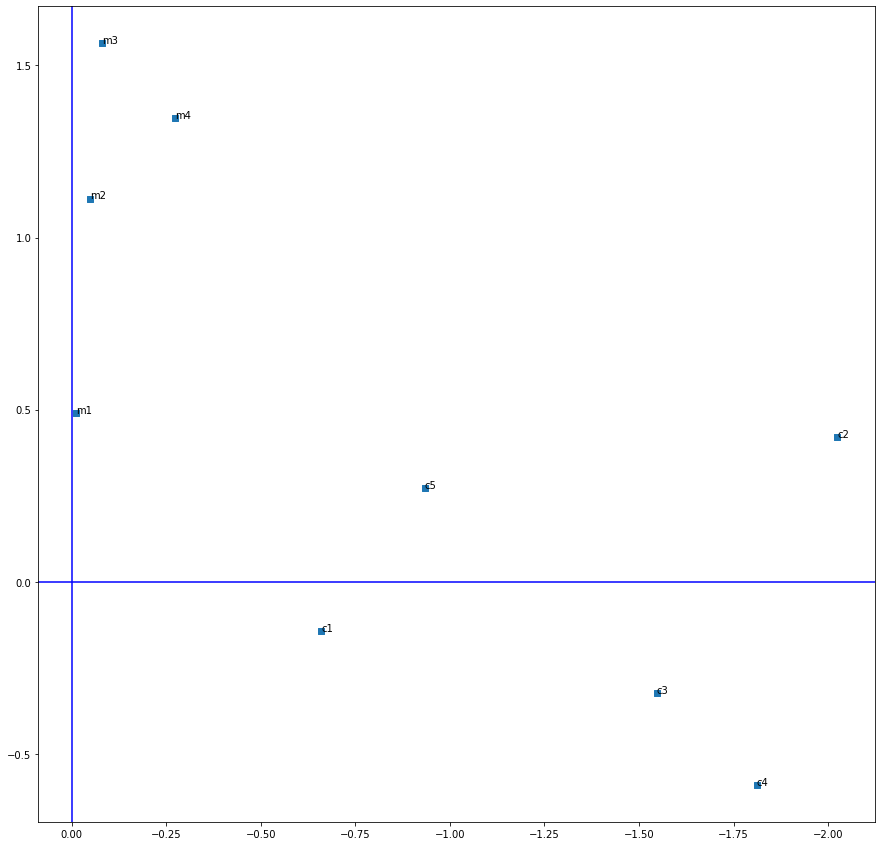

In [137]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(cordinates1[:, 0], cordinates1[:, 1], marker='s')
for i, txt in enumerate(createDocName(documents)):
    ax.annotate(txt, (cordinates1[i, 0], cordinates1[i, 1]))

plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.gca().invert_xaxis()

plt.show()

##### Expected
```CPP
[[-0.65946641 -0.14211544]
 [-2.02454304  0.42088758]
 [-1.54655358 -0.32358919]
 [-1.81114125 -0.5890525 ]
 [-0.9336738   0.2713894 ]
 [-0.01274618  0.49016179]
 [-0.04888203  1.11294703]
 [-0.08063836  1.56345595]
 [-0.27381004  1.34694158]]
```
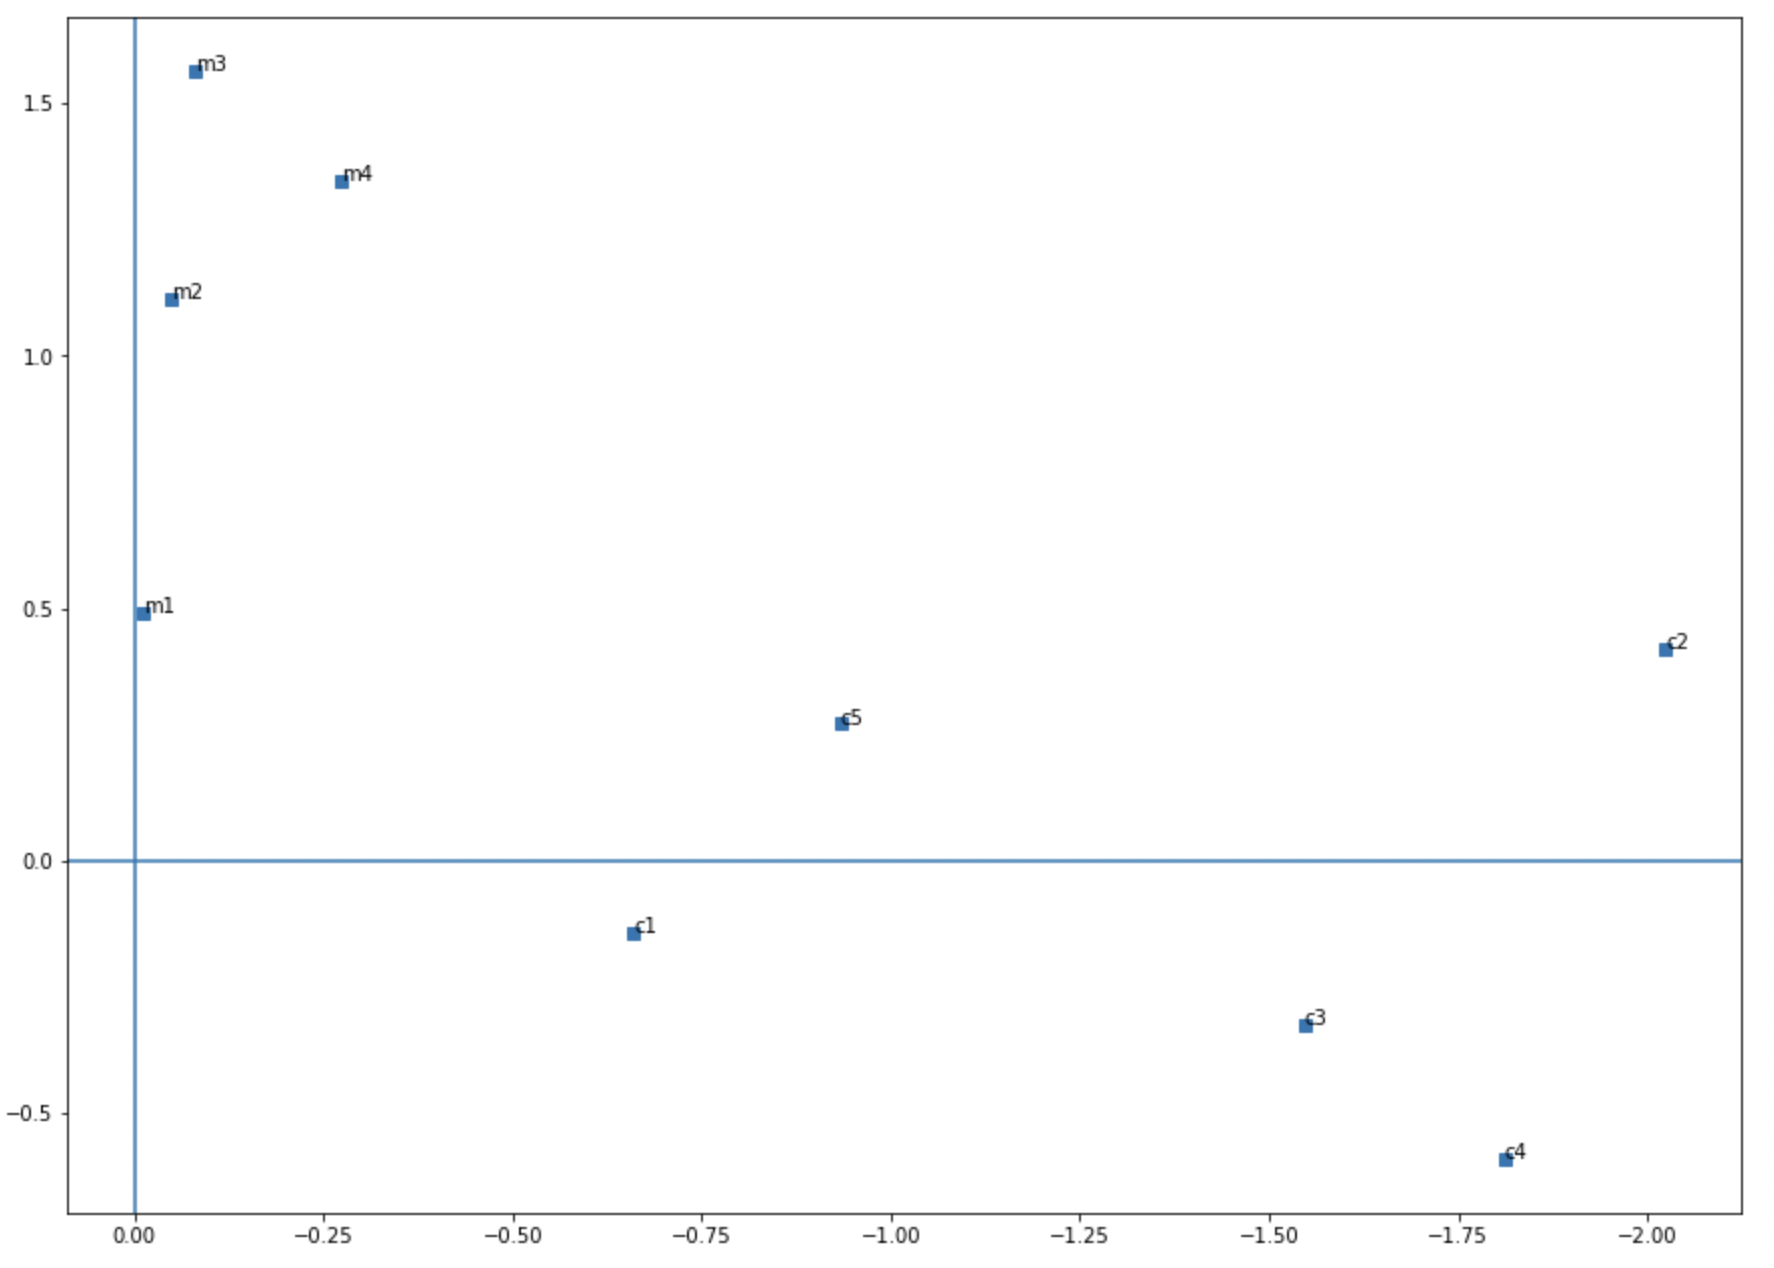

### Visualize terms in 2D space

In [138]:
#Visualize terms and print coordinates

cordinates2 = np.matmul(Uk, Sk)
cordinates2

array([[-0.73950722, -0.28766875],
       [-0.66031031, -0.18322558],
       [-0.80338307,  0.10967936],
       [-0.68794764,  0.69552995],
       [-1.34837689,  0.14505553],
       [-2.15313661, -0.42522964],
       [-0.88545938,  0.27236759],
       [-0.88545938,  0.27236759],
       [-1.00503193, -0.35906729],
       [-0.04258352,  1.24584472],
       [-0.12072567,  1.58293385],
       [-0.1060942 ,  1.14505897]])

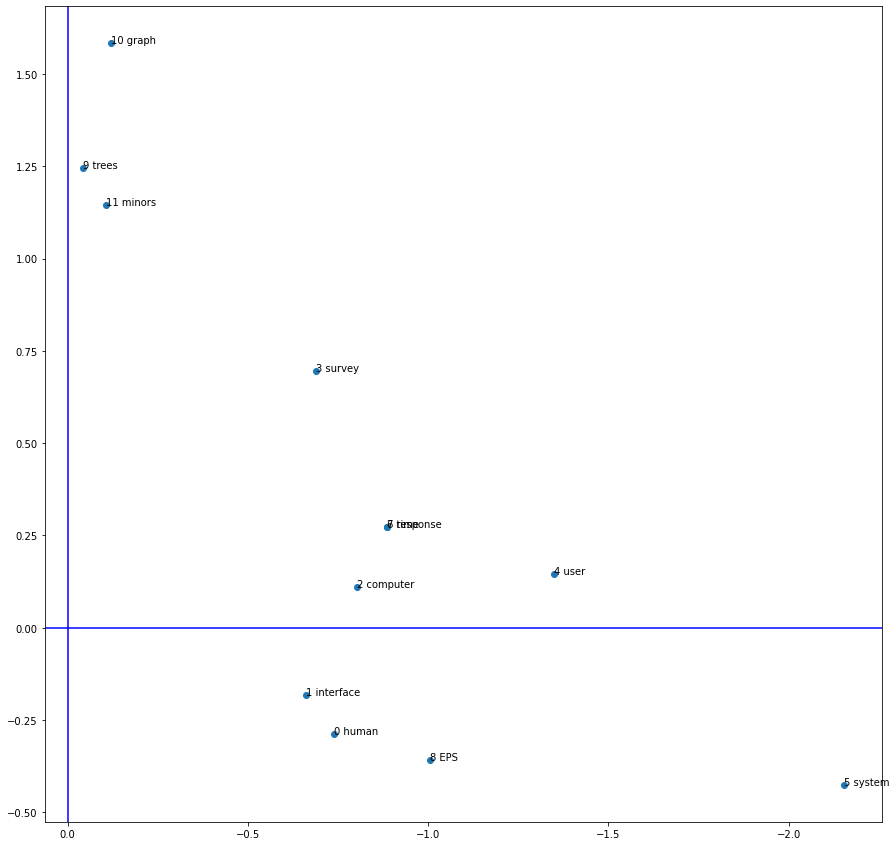

In [139]:
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(cordinates2[:, 0], cordinates2[:, 1], marker='o')
for i, txt in enumerate(word_to_ix):
    ax.annotate(str(i) +' ' + txt, (cordinates2[i, 0], cordinates2[i, 1]))

plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.gca().invert_xaxis()

plt.show()

##### Expected
```CPP
[[-0.73950722 -0.28766875]
 [-0.66031031 -0.18322558]
 [-0.80338307  0.10967936]
 [-1.34837689  0.14505553]
 [-0.68794764  0.69552995]
 [-2.15313661 -0.42522964]
 [-0.88545938  0.27236759]
 [-0.88545938  0.27236759]
 [-1.00503193 -0.35906729]
 [-0.04258352  1.24584472]
 [-0.12072567  1.58293385]
 [-0.1060942   1.14505897]]
```
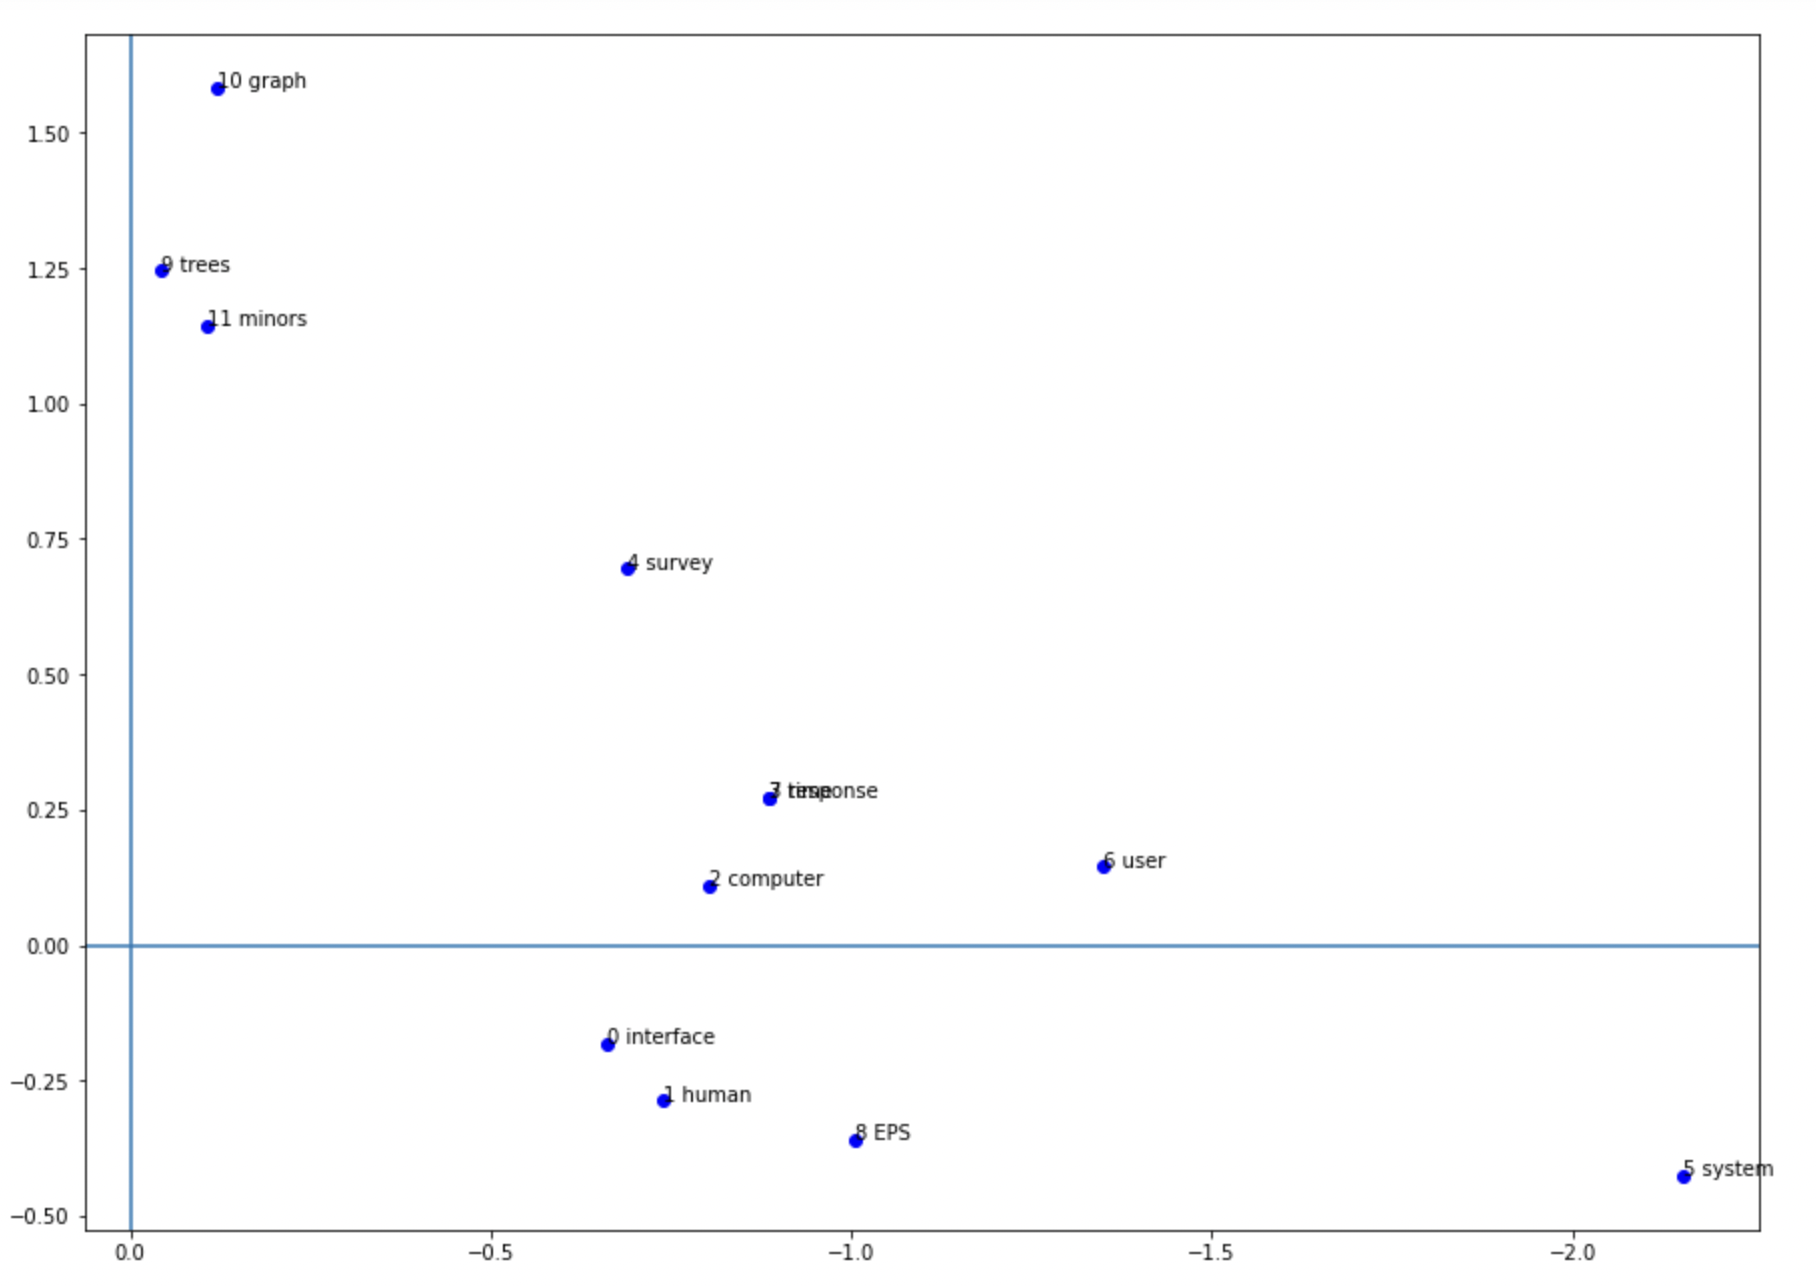

## <CENTER>Task-3 (10 Points)

### Find matching documents for given document

In [171]:
# Hint create query vector for input document. Calculate its cosine distance from other documents

def query(s, Uk, Sk, Vk_t, word_to_ix, documents, min_score):
    '''
    Input:
        s:query document.
        Uk:Term matrix
        Sk:singular value matrix
        Vk_t:Document matrix
        word_to_ix: {word, index} map
        documents:list of document
        min_score:min score beyond which documents are considerd matching
    Output:
        q_hat: coordinates of query vector
        matches: list of tuples containing matching document and its score
    '''
    doc = s.split(' ')
    query = np.zeros([len(word_to_ix)])
    for k,v in word_to_ix.items():
      count = 0
      for word in doc:
        if word == k:
          count += 1

      query[v] = count
    
        
    q_hat = np.matmul(query.T, Uk)


    doc_cod = np.matmul(Vk_t, Sk)
    matches = []

    for i in range(len(doc_cod)):
      cosines = np.dot(doc_cod[i], q_hat)/(np.linalg.norm(doc_cod[i])*np.linalg.norm(q_hat))
      if cosines > min_score:
        matches.append((documents[i],cosines))
    
    matches = sorted(matches, reverse = 1, key = lambda x:x[1])

    return q_hat, matches

In [172]:
q_hat, matches = query('human computer interaction', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat)

if matches is not None:
    print(matches)
else:
    print("No matches found")

[-0.461821   -0.07002767]
[('The EPS user interface management system', 0.998445281334027), ('Human machine interface for Lab ABC computer applications', 0.9980930095689972), ('System and human system engineering testing of EPS', 0.986588640555659), ('A survey of user opinion of computer system response time', 0.9374863669686567), ('Relation of user-perceived response time to error measurement', 0.907559436264429)]


##### Expected
```CPP
[-0.461821   -0.07002767]
[('The EPS user interface management system', 0.9984452813340272), ('Human machine interface for Lab ABC computer applications', 0.9980930095689974), ('System and human system engineering testing of EPS', 0.9865886405556598), ('A survey of user opinion of computer system response time', 0.9374863669686595), ('Relation of user-perceived response time to error measurement', 0.9075594362644345)]
```

### Visual representation of query/document

In [147]:
pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


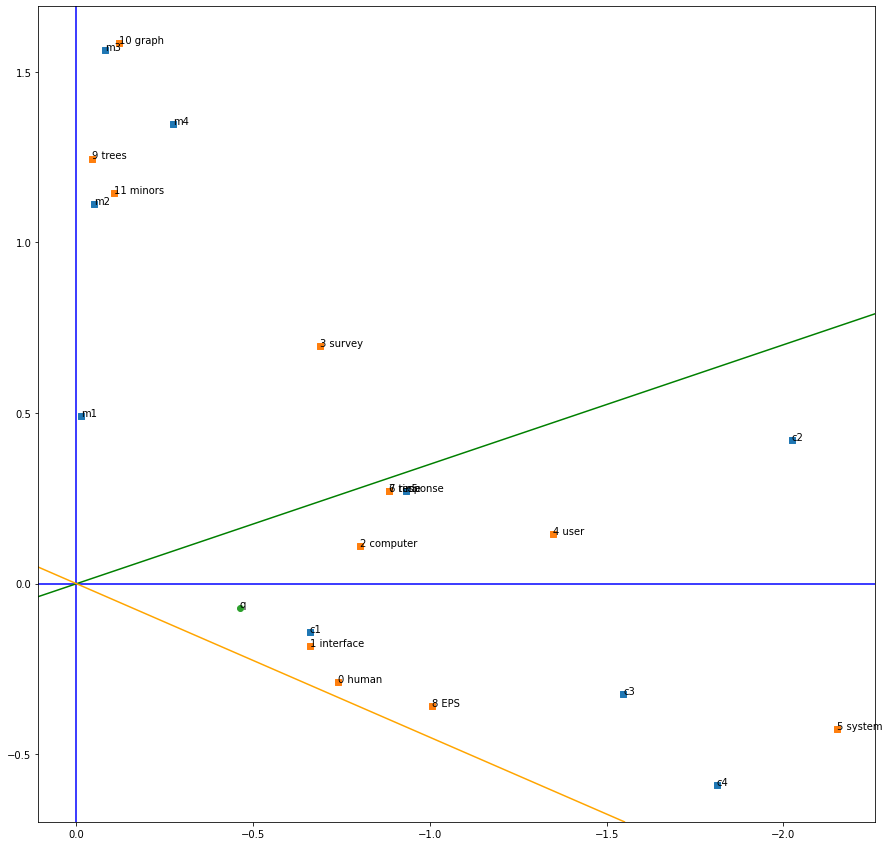

In [173]:
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(cordinates1[:, 0], cordinates1[:, 1], marker='s')
ax.scatter(cordinates2[:, 0], cordinates2[:, 1], marker='s')
ax.scatter(q_hat[0], q_hat[1], marker='o')
ax.annotate('q', (q_hat[0], q_hat[1]))

for i, txt in enumerate(createDocName(documents)):
    ax.annotate(txt, (cordinates1[i, 0], cordinates1[i, 1]))
  
for i, txt in enumerate(word_to_ix):
    ax.annotate(str(i) +' ' + txt, (cordinates2[i, 0], cordinates2[i, 1]))

plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.gca().invert_xaxis()

plt.axline((0, 0), slope=-0.35, color="green", linestyle='-')
plt.axline((0, 0), slope=0.45, color="orange", linestyle='-')

plt.show()

##### Expected

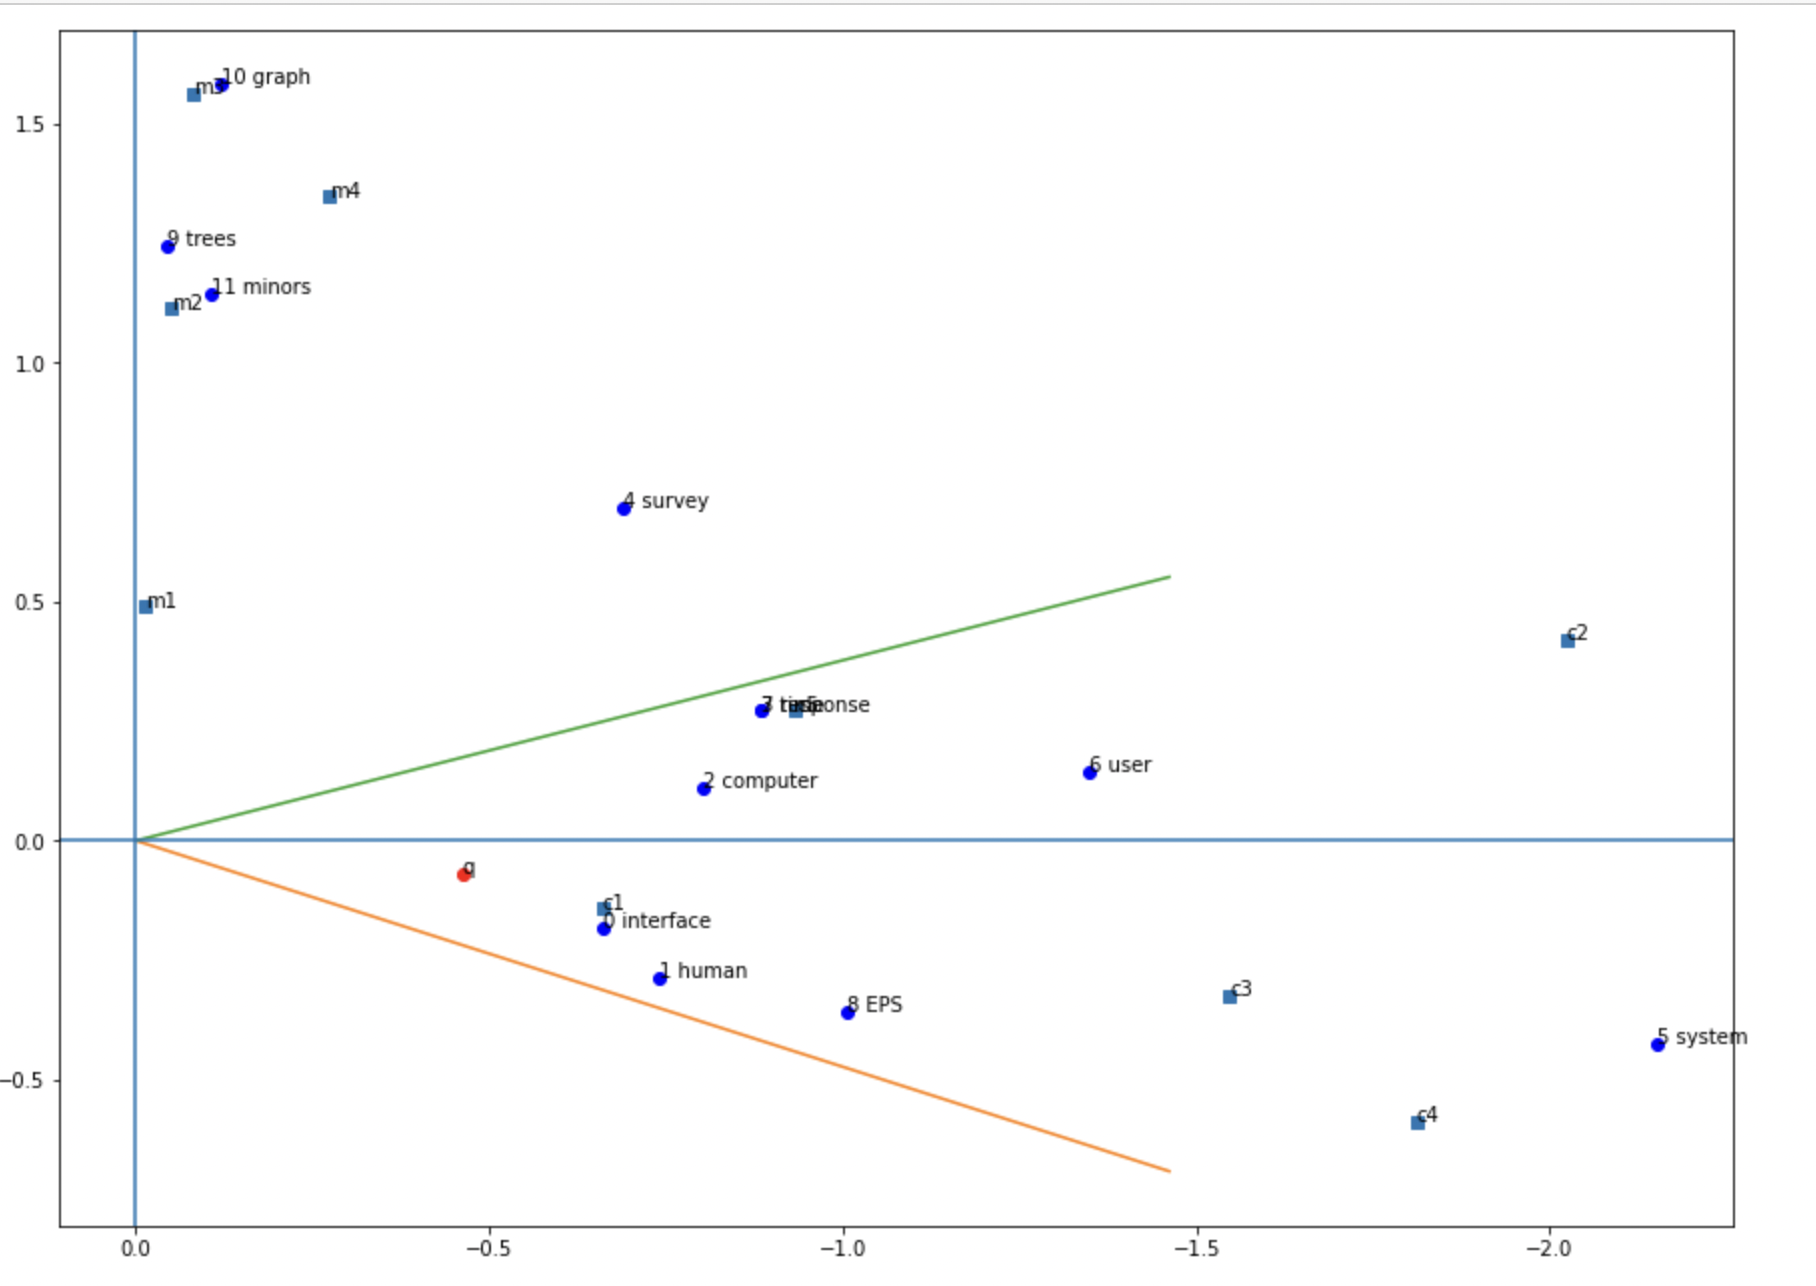


## **Theory questions: (5 points)**
- A) Give short description of Left-eigen vectors, right-eigen vectors and eigen-values matrix retured by Singular Value Decompostion of document-terms count matrix.
- B) Visually represent the document "Graph and tree generation" in 2D space along with words and documents as given in previous question.

**A)**
* The singular value decomposition (SVD) in linear algebra factors a real or complex matrix. It extends the orthonormal eigenbasis of an orthonormal square normal matrix's eigendecomposition to any displaystyle M x N matrix. 

* SVD of a matrix A (M x N) will be : A = UΣV, where where U is an M X M  complex unitary matrix, Σ is an M x N rectangular diagonal matrix with non-negative real numbers on the diagonal, and V is an N x N n complex unitary matrix.

* In our case, A is the the document-term count (Td) and U is the left eigen vectors, which is the normalised eigen vector of Td.Tdᵀ ; Similarly V is the right eigen vectors, which is the normalised eigen vector of Tdᵀ.Td. And, Σ is the diagonal matrix consisting the eigen values of Td.Tdᵀ  or Tdᵀ.Td

---
**B)**












In [174]:
q_hat1, matches1 = query('graph and tree generation', Uk, Sk, Vk_t, word_to_ix, documents, 0.9)
print(q_hat1)

if matches is not None:
    print(matches1)
else:
    print("No matches found")

[-0.03613585  0.62278523]
[('Graph minors IV: Widths of trees and well-quasi-ordering', 0.9999793491388691), ('The intersection graph of paths in trees', 0.9999010903647539), ('The generation of random, binary, unordered trees', 0.9994893286320654), ('Graph minors: A survey', 0.9898509606948506)]


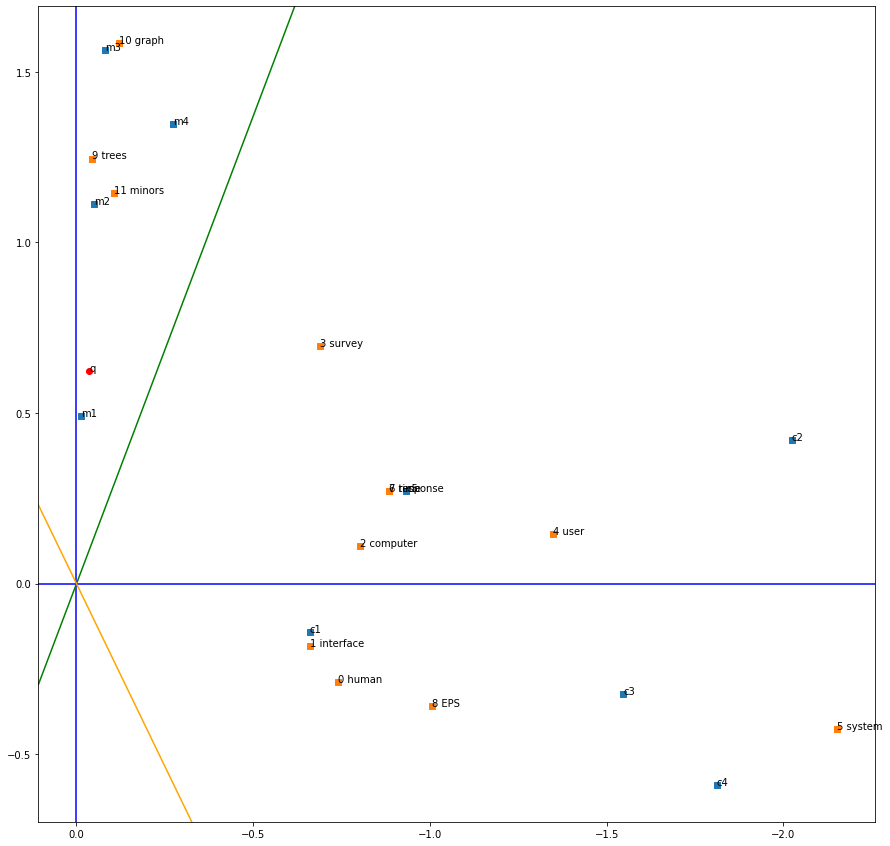

In [181]:
f, ax = plt.subplots(figsize=(15, 15))
ax.scatter(cordinates1[:, 0], cordinates1[:, 1], marker='s')
ax.scatter(cordinates2[:, 0], cordinates2[:, 1], marker='s')
ax.scatter(q_hat1[0], q_hat1[1], marker='o', color = 'red')
ax.annotate('q', (q_hat1[0], q_hat1[1]))

for i, txt in enumerate(createDocName(documents)):
    ax.annotate(txt, (cordinates1[i, 0], cordinates1[i, 1]))
  
for i, txt in enumerate(word_to_ix):
    ax.annotate(str(i) +' ' + txt, (cordinates2[i, 0], cordinates2[i, 1]))

plt.axhline(y=0, color='b', linestyle='-')
plt.axvline(x=0, color='b', linestyle='-')
plt.gca().invert_xaxis()

plt.axline((0, 0), slope=-2.74, color="green", linestyle='-')
plt.axline((0, 0), slope=2.14, color="orange", linestyle='-')

plt.show()

# Q2. n-Gram Language Models

Your task is to train n-gram language models. [Ref SLP Chapter 3]

- Task 1: You will train unigram, bigram, and trigram models on given training files. Then you will score on given test files for unigram, bigram, and trigram. you will generate sentences from the trained model and compute perplexity.
- Task 2: You will create training data for n > 3. and Repeat the above task from training model.
<h6>Part-A = (55 Points) </h6>

In [42]:
'''
Your imports go here
You are encouraged to implement your own functions and not use from library.
'''
import sys
from collections import Counter
import numpy as np

In [43]:
# constants to define pseudo-word tokens
# access via UNK, for instance
# for this assignemnt we will follow <s> tag for beginning of sentence and
# </s> for end of senetence as suggested in SLP Book. Check sample training files for reference.
UNK = "<UNK>"
SENT_BEGIN = "<s>"
SENT_END = "</s>"

We need to initialise global variables for model

In [44]:
"""Initializes Parameters:
  n_gram (int): the n-gram order.
  is_laplace_smoothing (bool): whether or not to use Laplace smoothing
  threshold: words with frequency  below threshold will be converted to token
"""
# Initializing different object attributes
n_gram = 3
is_laplace_smoothing = True
vocab = [] 
n_gram_counts = {}
n_minus_1_gram_counts = {}
n_gram_list=[]
threshold = 1


### Implement training function (10 points)

In [45]:
def make_ngrams(tokens: list, n: int) -> list:
    """Creates n-grams for the given token sequence.
    Args:
    tokens (list): a list of tokens as strings
    n (int): the length of n-grams to create

    Returns:
    list: list of tuples of strings, each tuple being one of the individual n-grams
    """
    n_grams = []
    ## Your code here
    for i in range(len(tokens)-n+1):
        n_grams.append(tuple(tokens[i:i+n]))
    return n_grams

In [46]:
def train(training_file_path):
    """Trains the language model on the given data. Input file that
    has tokens that are white-space separated, has one sentence per line, and
    that the sentences begin with <s> and end with </s>
    Parameters:
      training_file_path (str): the location of the training data to read

    Returns:
    N Gram Counts, Vocab, N Minus 1 Gram Counts
    """
    with open(training_file_path, 'r') as file:
      content = file.read().split() # Read and split data to get list of words
    
    # Get the count of each word
    count = Counter(content)
    unigram_counts = {}
    # Replace the words with <UNK> if count is < threshold(=1)
    for i in range(len(content)):
      if count[content[i]] <= threshold:
        content[i] = '<UNK>'
      else:
        unigram_counts[content[i]] = count[content[i]]

    # make use of make_n_grams function
    # Get the training data vocabulary
    # For n>1 grams compute n-1 gram counts to compute probability
    if n_gram == 1:
      n_gram_counts=unigram_counts
      n_minus_1_gram_counts = None
    else:
      n_gram_counts=dict(Counter(make_ngrams(content,n_gram)))
      n_minus_1_gram_counts = Counter(make_ngrams(content, n_gram - 1))
 
    vocab = list(set(content))
    return n_gram_counts, vocab, n_minus_1_gram_counts

Output your Trained Data Parameters:

In [47]:
n_gram_counts, vocab, n_minus_1_gram_counts = train("/content/berp-training-tri.txt")

print(n_gram_counts)

print(vocab)

{('<s>', '<s>', "let's"): 196, ('<s>', "let's", 'start'): 163, ("let's", 'start', 'over'): 136, ('start', 'over', '</s>'): 366, ('over', '</s>', '</s>'): 367, ('</s>', '</s>', '<s>'): 6755, ('</s>', '<s>', '<s>'): 6755, ('<s>', '<s>', 'my'): 6, ('<s>', 'my', 'mother'): 1, ('my', 'mother', 'is'): 1, ('mother', 'is', 'coming'): 1, ('is', 'coming', 'to'): 1, ('coming', 'to', 'visit'): 1, ('to', 'visit', 'and'): 1, ('visit', 'and', "i'd"): 1, ('and', "i'd", 'like'): 5, ("i'd", 'like', 'to'): 409, ('like', 'to', 'take'): 8, ('to', 'take', '<UNK>'): 1, ('take', '<UNK>', 'to'): 1, ('<UNK>', 'to', 'dinner'): 1, ('to', 'dinner', '</s>'): 7, ('dinner', '</s>', '</s>'): 224, ('<s>', '<s>', 'new'): 1, ('<s>', 'new', 'query'): 1, ('new', 'query', '</s>'): 1, ('query', '</s>', '</s>'): 2, ('<s>', '<s>', 'now'): 7, ('<s>', 'now', "i'm"): 3, ('now', "i'm", 'interested'): 6, ("i'm", 'interested', 'in'): 33, ('interested', 'in', 'some'): 2, ('in', 'some', 'middle'): 1, ('some', 'middle', 'eastern'): 5, 

### Scoring function (points 5):
Implement Score function that will take input sentence and output probability of given string representing a single sentence.

In [89]:
import math

def score(sentence):
    """Calculates the probability score for a given string representing a single sentence.
    Parameters:
      sentence (str): a sentence with tokens separated by whitespace to calculate the score of
      
    Returns:
      float: the probability value of the given string for this model
    """
    tokens = sentence.split()
    for i in range(len(tokens)):
        if tokens[i] not in vocab:
            tokens[i]=UNK

    probability =[]
    log_probability=0
    if n_gram == 1:
        for i in range(len(tokens)):
            temp=0
            word_count = len(n_gram_list)
            if tokens[i] in n_gram_counts:
                n_gram_count = n_gram_counts[tokens[i]];
            else:
                n_gram_count = 0;
            if is_laplace_smoothing:
                n_gram_count += 1
                log_probability += math.log(n_gram_count)-math.log(word_count+len(vocab))
            else:
                log_probability += math.log(n_gram_count)-math.log(word_count)
    else:
    
      for i in range(n_gram, len(tokens)+1):
        if tuple(tokens[i-n_gram : i]) in n_gram_counts:
            n_gram_count = n_gram_counts[tuple(tokens[i-n_gram : i])]
        else: 
            n_gram_count = 0
        prefix_count = n_minus_1_gram_counts[tuple(tokens[i - n_gram: i - 1])]
        if is_laplace_smoothing:
            n_gram_count += 1
            log_probability+=math.log(n_gram_count)-math.log(prefix_count+len(vocab))
        else:
            log_probability+=math.log(n_gram_count)-math.log(prefix_count)

    probablity = math.exp(log_probability)
    return probablity

In [90]:
with open("/content/hw2-test-tri.txt", 'r') as fh:
    test_content = fh.read().split("\n")
num_sentences_1 = len(test_content)
ten_sentences_1 = test_content[:10]
print("# of test sentences: ", num_sentences_1)
probablities = []

# of test sentences:  102


In [91]:
# print probabilities/score of sentences in test content
for sentence in test_content:
  probablities.append(score(sentence))
probablities = np.array(probablities)
mean = np.mean(probablities)
std_dev = np.std(probablities)

In [92]:
probablities, mean, std_dev

(array([4.26146185e-12, 2.19171050e-10, 1.30095431e-20, 7.17115786e-17,
        4.70703057e-24, 1.39873800e-15, 3.56451309e-16, 5.21390342e-29,
        8.78952688e-21, 3.20556148e-06, 2.95853307e-12, 1.15501134e-13,
        2.55882247e-16, 3.20368533e-07, 1.85539378e-15, 9.24526318e-08,
        1.27973823e-07, 2.71602248e-08, 6.05662680e-16, 2.93282631e-24,
        1.28059031e-41, 1.09358616e-37, 1.64035616e-24, 3.22340184e-20,
        6.56249118e-20, 1.99334911e-13, 6.15724143e-08, 1.06464694e-12,
        2.07407816e-25, 2.80233246e-16, 5.44252283e-12, 6.90638470e-21,
        1.76882509e-16, 1.36911469e-14, 3.27005938e-22, 5.95887771e-20,
        6.30357864e-10, 4.87849915e-10, 1.71843811e-16, 5.17123491e-13,
        6.64842920e-17, 4.26810359e-15, 4.07521410e-14, 8.99687048e-21,
        8.00919196e-18, 3.08596027e-18, 1.49568352e-13, 1.14157752e-13,
        5.87537271e-21, 5.75441443e-24, 5.11939360e-26, 4.79392151e-18,
        3.71885132e-07, 3.72097176e-05, 3.72097176e-05, 1.401688

### Sentence generation (10 points)
Generate sentence from the above trained model
- To generate next word from a set of probable n-grams and their probabilities check below tutorial:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html

In [93]:
def generate_sentence():
    """Generates a single sentence from a trained language model using the Shannon technique.
      
    Returns:
      str: the generated sentence
    """
    # Start with <s> and randomly generate words until we encounter sentence end
    sent = ["<s>"]
    # Append sentence begin markers for n>2
    if n_gram > 2:
      sent.append("<s>")
    # Keep track of previous word for stop condition
    prev_word = "<s>"
    i = 0
    if n_gram > 1:
      while prev_word != "</s>":
        # Construct the (n-1) gram so far
        prev_n_1_gram={}
        for word in n_gram_counts:
            if word[:-1] == tuple(sent[i:n_gram-1+i]):
                prev_n_1_gram[word[-1]]=n_gram_counts[word]
        # Get the counts of all available choices based on n-1 gram
        # Convert the counts into probability for random.choice() function
        probablities =  np.array(list(prev_n_1_gram.values()))/ np.sum(np.array(list(prev_n_1_gram.values())))
        word = np.random.choice(np.array(list(prev_n_1_gram.keys())), p=probablities)
        # If <s> is generated, ignore and generate another word
        if word == "<s>":
          continue
        sent.append(word)
        prev_word = word
        i+=1
    else:
      # In case of unigram model, n-1 gram is just the previous word and possible choice is whole vocabulary
      while prev_word != "</s>":
        # Convert the counts into probability for random.choice() function
        probablities =  np.array(list(n_gram_counts.values()))/ np.sum(np.array(list(n_gram_counts.values())))
        word = np.random.choice(np.array(list(n_gram_counts.keys())), p=probablities)
        # If <s> is generated, ignore and generate another word
        if word == "<s>":
            continue
        sent.append(word)
        prev_word = word

    # Append sentence end markers for n>2
    if n_gram > 2:
      sent.append("</s>")
    
    return " ".join(sent)

In [94]:
def generate(n):
    """Generates n sentences from a trained language model using the Shannon technique.
    Parameters:
      n (int): the number of sentences to generate
      
    Returns:
      list: a list containing strings, one per generated sentence
    """
    # Generate sentences one by one and store
    
    return [generate_sentence() for i in range(n)]

In [95]:
sentences = generate(50)
print("Sentences:")
for sentence in sentences:
  print(sentence)

Sentences:
<s> <s> should cost less than five dollars or less </s> </s>
<s> <s> i want something within walking distance i can eat breakfast </s> </s>
<s> <s> do you have any information about shilpa please </s> </s>
<s> <s> i would like to eat chinese food </s> </s>
<s> <s> i'd like to eat on shattuck from icsi </s> </s>
<s> <s> not expensive </s> </s>
<s> <s> i did not say thai i said i've got a car so it should be uh in some french food </s> </s>
<s> <s> i will be fine </s> </s>
<s> <s> i want a french restaurant please </s> </s>
<s> <s> can i have no money </s> </s>
<s> <s> lunch </s> </s>
<s> <s> tell me also about restaurants in berkeley </s> </s>
<s> <s> i want to spend more money </s> </s>
<s> <s> the restaurant </s> </s>
<s> <s> can you give me some more information about ay-caramba </s> </s>
<s> <s> i want to travel three hundred kilometers </s> </s>
<s> <s> i'd like to know about blue nile </s> </s>
<s> <s> more than ten miles </s> </s>
<s> <s> tell me which restaurants serv

### Evaluate model perplexity (5 points)
Measures the perplexity for the test sequence with your trained model. 
you may assume that this sequence may consist of many sentences "glued together"

The perplexity of the given sequence is the inverse probability of the test set, normalized by the number of words.


In [96]:
# Since this sequence will cross many sentence boundaries, we need to include 
# the begin- and end-sentence markers <s> and </s> in the probability computation. 
# We also need to include the end-of-sentence marker </s> 
# but not the beginning-of-sentence marker <s>) in the total count of word tokens N

def perplexity(test_sequence):
    """.
    Parameters:
      test_sequence (string): a sequence of space-separated tokens to measure the perplexity of

    Returns:
      float: the perplexity of the given sequence
    """ 
    # Replace out of vocab words with <UNK>, already done in score function
    # test_sequence = [token if token in vocab else UNK for token in test_sequence.split()]
    seq = [token for token in test_sequence.split() if token !="<s>"]

    
    # Get the probability for the sequence
    prob = score(str(seq))
    perplexity = (prob)**(-1/len(seq))
    
    return perplexity

In [97]:
print(perplexity(" ".join(sentences[:10])))

110.27355268553933


### **Explore and explain: (5 points)**
* Experiment n_gram model for n = [1,2,3..7] of your choice. Explain the best choice of n that generates more meaninful sentences.

Since we are using inverse probability, we may interpret perplexity as the inverse probability of the test set. A model with a lower perplexity is therefore more accurate. The sentences produced when the n gram is 2 are more meaningful and also have the lowest perplexity (40) when compared to the perplexities of 1-gram (210) and 3-gram (110). Additionally, the perplexities of 4-gram, 5-gram, 6-gram, and 7-gram are 78, 110, 134, and 104 respectively. This information explains why 2 is the ideal number of n for the test data set.

# Q3. Classification using LSTM - using Tensorflow (30 Points)
In this part, we will be building a bidirectional LSTM network to train and inference sentiment analysis on IMDB dataset.<br>

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time to tweak your hyperparameters.
- Without a GPU, You might have to wait longer to experiment.

### Library Imports

In [98]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

### Visualizing data distribution (1 Point)


In [99]:
## Reading the data and removing columns that are not important. 
dataset = pd.read_csv("/content/movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [100]:
 #######################################################   
 # print head of data frame with help of head function # 
 #######################################################
 
dataset.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Petter Mattei's "Love in the Time of Money" is...  positive
4  Probably my all-time favorite movie, a story o...  positive

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


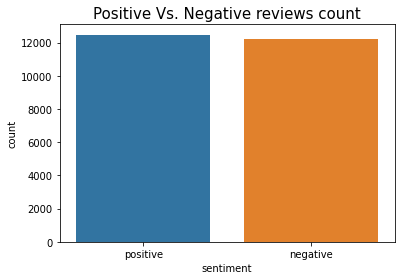

In [101]:
 ####################################################### 
 # plot Positive Vs. Negative reviews count            # 
 #######################################################

sns.countplot(dataset['sentiment'])

plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()



### Cleaning the Reviews (2 Points)

In [102]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [103]:
 #############################################################################################  
 # Clean all the reviews in the dataset using the clean_text function provided above         # 
 ############################################################################################# 
dataset['cleaned_review'] = dataset['review']

for i in range(len(dataset)):
  dataset['cleaned_review'][i] = clean_text(str(dataset['review'][i]))

In [104]:
 #####################################################################
 # print head of the "CLEANED" data frame with help of head function # 
 #####################################################################
 
dataset.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Petter Mattei's "Love in the Time of Money" is...  positive   
4  Probably my all-time favorite movie, a story o...  positive   

                                      cleaned_review  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  petter matteis love time money visually stunni...  
4  probably alltime favorite movie story selfless...

### Splitting the dataset and Encoding Labels (2 Points)

Spliting data: <br> 
80% for the training and the remaining 20% for validation.

Encoding Labels: <br>
Encode labels as negative and positive as 0 and 1 respectively


In [105]:
#################################################################################
# Initialize label encoder from sklearn module                                  #
# fit on train labels and transform both train and validation labels            #
#################################################################################

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dataset['sentiment'] = le.fit_transform(dataset['sentiment'])

dataset.head()

review  sentiment  \
0  One of the other reviewers has mentioned that ...          1   
1  A wonderful little production. <br /><br />The...          1   
2  I thought this was a wonderful way to spend ti...          1   
3  Petter Mattei's "Love in the Time of Money" is...          1   
4  Probably my all-time favorite movie, a story o...          1   

                                      cleaned_review  
0  one reviewer mentioned watching 1 oz episode y...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  petter matteis love time money visually stunni...  
4  probably alltime favorite movie story selfless...

In [106]:
#################################################################################
# Split the data using the sklearn module                                       #
# 80% for the training and the remaining 20% for validation                     #
#################################################################################

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_review'], dataset['sentiment'], test_size=0.2, random_state=42)

In [107]:
X_train, y_train

(10422    kid loved computer animation although extremel...
 7341     film prof commercial cinema elsethe hollywood ...
 3015     really horrified eerie movie unusual dark atmo...
 8151     thats greatest comedy tv started 12 year since...
 17900    worst film ever seen bought dvd didnt work wel...
                                ...                        
 21575    admit watched film thought one soppy love stor...
 5390     first ignore comment south park make fun repub...
 860      19month old got really tired watching care bea...
 15795    willing give rendition benefit doubt came nega...
 23654    guessing reason movie well box office course e...
 Name: cleaned_review, Length: 19759, dtype: object, 10422    1
 7341     0
 3015     0
 8151     1
 17900    0
         ..
 21575    1
 5390     1
 860      1
 15795    0
 23654    0
 Name: sentiment, Length: 19759, dtype: int64)

### Pre-Processing The Text (5 Points)
 

In [108]:
# You can use the modules given below
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

###############################################################################  
# Fit your tokenizer on the training reviews                                  #
###############################################################################
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train.values)


In [109]:
#################################################################################################
# The word_index dictionary assigns a unique index to each unique word present in the training  #
# reviews.                                                                                      #
#                                                                                               #
# Create the word_index dictionary using the tokenizer                                          #
# Find the vocabulary of your training reviews                                                  #
#################################################################################################

word_index = tokenizer.word_index

vocabulary = set(word_index.keys())

In [110]:
#################################################################################################
# Convert the reviews in the dataset to their index form by using a function available          #
# with the tokenizer                                                                            #
# HINT : convert training and validation reviews into sequences                                 #
#################################################################################################

sequences_train = tokenizer.texts_to_sequences(X_train.values)


sequences_test = tokenizer.texts_to_sequences(X_test.values)


#################################################################################################
# Pad the the training and validation sequences so all of them have the same length             # 
# set maxlen = 200                                                                              #
#################################################################################################
X_train_padded = pad_sequences(sequences_train,padding="post", truncating = 'post', maxlen = 200)

X_test_padded = pad_sequences(sequences_test,padding="post", truncating = 'post', maxlen = 200)

# maxlen which is the maximum length of one review we will use for our training

print('Vocabulary : {}'.format(vocabulary))

Vocabulary : {'preordained', 'libeled', 'supermodern', 'kargil', 'glasgow', 'commandeers', 'neededbr', 'selfsame', 'predeccesors', 'disapproved', 'acus', 'qatsi', 'unsuspenseful', 'youtubebr', 'cumberbatch', 'ensnaring', 'busybody', 'kingsford', 'hollywoodish', 'stolenbr', 'lunch', 'yuma', 'sydrowis', '15year', 'incites', 'tamaura', 'overrules', 'dimple', 'nuthouse', 'hunchbacked', 'suspensethe', 'hearken', 'rasuldai', 'kinkades', 'isi', 'lanscaping', 'teachersmre', 'authorizing', 'actthe', 'partake', 'conventionsâ', 'attempting', 'roadtrip', 'hollywoody', 'millionsno', 'extendingbr', 'colorlessly', 'reviewthough', 'unveiling', 'baaaaaaaaaaad', 'chopsocky', 'jung', 'hash1955', 'deceptively', 'bure', 'dorrit', 'bagger', 'statistical', 'aintbr', 'headmuststop', 'snoozefest', 'hercules', 'beautifullybr', 'artforms', 'hintbr', 'knitted', 'oleg', 'blum', 'portayal', 'onthere', 'knockdown', 'boybr', 'ofa', 'womanhating', 'courthouse', 'dimtri', 'roleas', 'postscream', 'lauries', 'royles', 'v

### Using glove vectors for embedding (5 Points)

GloVe vectors capture both global statistics and local statistics of a corpus. We use GloVe to convert words to embeddings in the vector space based on their semantics. 

We will be using the 200-dimensional GloVe vectors for the task at hand.

To learn more about GloVe please read the following resource:
- https://nlp.stanford.edu/pubs/glove.pdf

In [111]:
glove_dictionary = {}
with open('/content/glove.6B.200d.txt') as file:
    for each_line in file:
        words_in_line, coeff_cients = each_line.split(maxsplit=1)
        coeff_cients = np.array(coeff_cients.split(),dtype = float)
        glove_dictionary[words_in_line] = coeff_cients

In [112]:
 # All the words which are not in the GloVe dictionary will be assigned a zero vector.

embedding_matrix = np.zeros((len(vocabulary), 200))

######################################################################
# The glove_dictionary contains words vs their respective embeddings #
#                                                                    #
# Create the embedding matrix using the glove_dictionary             #
######################################################################

for i in range(len(vocabulary)):
  if list(vocabulary)[i] in glove_dictionary:
    embedding_matrix[i] = glove_dictionary[list(vocabulary)[i]]

In [113]:
embedding_matrix.shape

(99734, 200)

Sample output : (99987, 200)

### Creating The Model (10)

If you need a refresher or have never worked with Neural Networks before, here are a few resources:
- https://web.stanford.edu/~jurafsky/slp3/7.pdf
- https://web.stanford.edu/~jurafsky/slp3/9.pdf
- https://colah.github.io/posts/2015-08-Understanding-LSTMs/


Training a neural network model will take time. 
- You can use Google Colab / Kaggle notebooks. You get a free GPU for a limited time.
- Without a GPU, You might have to wait longer to experiment.


Useful resources : <br>
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense <br>
https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout <br>





In [114]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Embedding, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
tf.random.set_seed(42)

######################################################
# Complete this linear model in tensorflow           #
######################################################


def build_model(embedding_matrix):
  ''' 
  Arguments:
    embedding_matrix : a matrix with the corresponding embeddings
    of all words.

  Returns:
    The LSTM model that you created.
  '''
  model = tf.keras.Sequential()
  
  # TO DO: layer 1 : add embedding layer
  # The embedding layer maps the words to their embedding vectors from the embedding matrix
  model.add(Embedding(len(vocabulary), 16, input_length=200))
  # TO DO: layer 2 : add Bidirectional LSTM Layer 
  model.add(Bidirectional(LSTM(8, return_sequences=True, input_shape=(None, 1))))

  # TO DO Add more layers : you can add more dense layers and dropout
  # NOTE : You should be able to achieve an validation accuracy greater than 85%
  #        within 10 epochs
  model.add(Bidirectional(LSTM(8)))
  model.add(Dropout(0.3))
  # TO DO Final layer : add output layer and activation 
  model.add(Dense(1, activation='sigmoid'))

  # TO DO : use a loss function, optimizer as adam to compile
  # and evaluate model on auc,precision,recall,accuracy
  # HINT : choose your loss function based on the task (binary classification)
  model.compile(optimizer="Adam", loss='binary_crossentropy', metrics=["acc", "AUC", "Precision", "Recall"])
  model.summary()
  return model

In [115]:
# NOTE : You should be able to achieve an validation accuracy greater than 85%
#        within 10 epochs
import os
model_checkpoint_callback = ModelCheckpoint(filepath='', save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
es = tf.keras.callbacks.EarlyStopping(monitor='val_acc',
                                      patience= 2, restore_best_weights= True)
#################################################################
# Call the build_model function and initialize the model        #
#################################################################
model = build_model(embedding_matrix)
#######################################################################################################
# train and validate the model on the padded sequences of text which we have created initially        #
#######################################################################################################
history = model.fit(X_train_padded, y_train, batch_size=64, epochs=10, verbose=1, validation_data=(X_test_padded, y_test), callbacks = es)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 16)           1595744   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 16)          1600      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 16)               1600      
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 1,598,961
Trainable params: 1,598,961
Non-

### Plotting Accuracy and Losses (5 Points)
 




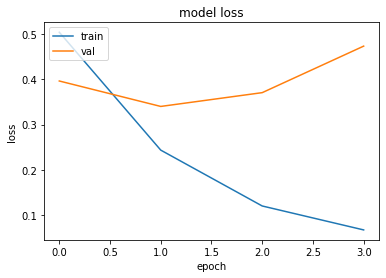

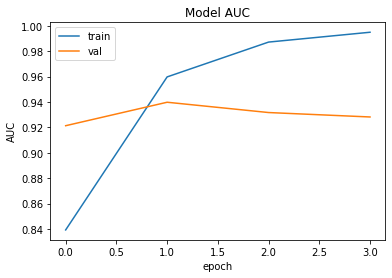

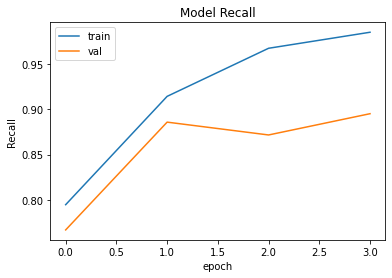

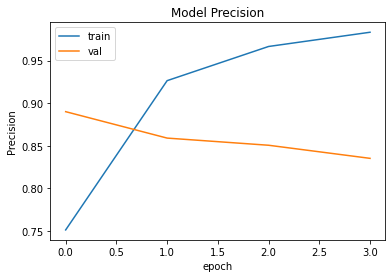

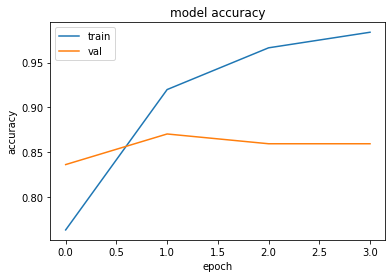

In [116]:
####################################
# PLOT :                           #
# train loss vs val loss           #
# train auc vs val auc             #
# train recall vs val recall       #
# train precision vs val precision #
# train accuracy vs val accuracy   #
####################################
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [117]:
# You will need to include the pickled model along with the other submission files
# The saved model will be used to verify your lstm's predictions on hidden reviews

##################################################################################
# Save your trained model as a pickle file named "lstm_classifier"               #
# You will be using this saved model to make predictions in the next module      #
##################################################################################

import pickle
pickle.dump(model, open('lstm_classifier', 'wb'))

INFO:tensorflow:Assets written to: ram://27f310b4-25b5-431e-a420-36b845d5b229/assets


INFO:tensorflow:Assets written to: ram://27f310b4-25b5-431e-a420-36b845d5b229/assets


### Prediction (5 Points)

In [118]:
######################################################################
# Load your saved model                                              #
# Use the saved model to make predictions                            #
######################################################################
import pickle
saved_model = pickle.load(open('lstm_classifier', 'rb'))

In [119]:
# use the saved model to predict the reviews
def predict_review(review):
  '''
  Arguments:
    review : A single review for which you want to predict the sentiment for.
             example: "This movie was amazing! I would defenitely watch it again."

  Returns:
    The predicted sentiment for the review : either 1 or 0
  '''
  review = clean_text(review)
  empty = []
  empty.append(review)
  review_padded = pad_sequences(tokenizer.texts_to_sequences(empty),padding="post", truncating = 'post', maxlen = 200)
  if saved_model.predict(review_padded) > 0.5:
    return 1
  else:
    return 0
 ############################################################################# 
 # Predict the sentiment for the given review using the model                #
 # that you trained and return the sentiment                                 #
 #                                                                           #
 # HINT : Remember that the review needs to be "preprocessed" before you use #
 # it for prediction                                                         #
 #############################################################################

In [120]:
# Do not edit this cell

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = predict_review(review)
    print(f'{review[:100]} -> {p}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0


### Expected Output:

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 0 <br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 1 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 0